Importing Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Pre-Processing :

In [2]:
gold_data = pd.read_csv("gld_price_data.csv")

In [3]:
#printing first 5 rows of dataset

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#printing last 5 rows of dataset

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#getting info about dataset

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#no of rows & columns 

gold_data.shape

(2290, 6)

In [7]:
#checking for missing values 

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting statiscal measures of dataset

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correleation :

In [10]:
gold_data = gold_data.drop(columns = 'Date', axis = 1)

In [13]:
correlation = gold_data.corr()

<Axes: >

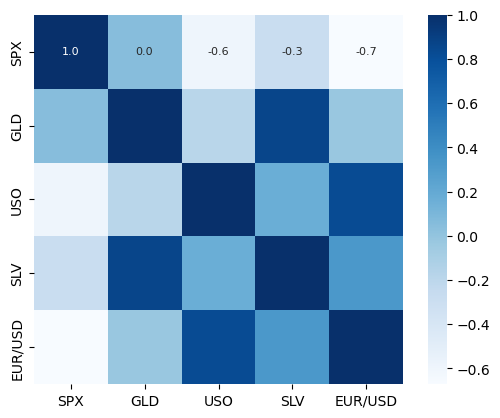

In [14]:
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap='Blues')

In [16]:
#corr values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\adhic\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Count'>

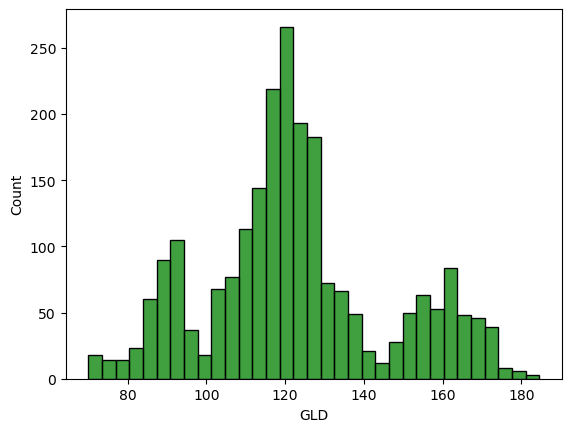

In [17]:
#checking distribution of GLD price

sns.histplot(gold_data['GLD'], color = 'green')

Splitting Features and Target :

In [18]:
X = gold_data.drop(columns = 'GLD', axis = 1)
Y = gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training & Testing Data :

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

Model Training :

Random Forest Regressor

In [22]:
model = RandomForestRegressor()

In [23]:
model.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation :

In [24]:
test_pred = model.predict(X_test)

In [25]:
print(test_pred)

[168.35249914  82.43219956 116.24690036 127.65810054 120.67660147
 154.80069697 150.32319807 126.23480019 117.54969892 126.08860027
 116.79400069 171.77840044 141.86119858 167.94249832 115.26260012
 117.49660049 138.44050324 170.02860065 159.32760332 158.05539934
 155.0079003  125.4058003  175.58779885 157.37590317 125.12180049
  93.94459995  77.7757004  120.53439987 119.00839877 167.44669938
  88.26420047 125.13029964  91.1560009  117.67180008 121.05589926
 135.83470071 115.80530095 115.15540071 147.87289962 107.10980123
 104.07750256  87.06969771 126.55290053 117.97220009 153.29089874
 119.58119995 108.35030004 107.94929838  93.23370071 127.0248981
  75.48130026 113.69939929 121.28319994 111.23489906 118.81499903
 120.66339929 159.79170053 167.95370131 146.80729673  85.90029886
  94.45990041  86.82189873  90.66560046 119.00410061 126.48760081
 127.53619998 170.18169965 122.19079924 117.33429877  98.51709999
 168.61150164 143.05319861 131.64580325 121.11670203 121.74579939
 119.783000

In [26]:
#R sq Error 

r2_score = metrics.r2_score(Y_test, test_pred)
print("R Sq Error : ", r2_score) 

R Sq Error :  0.9895989971429676


Comaparing the Actual Values & Predicted Values in a Plot :

In [27]:
Y_test = list(Y_test)

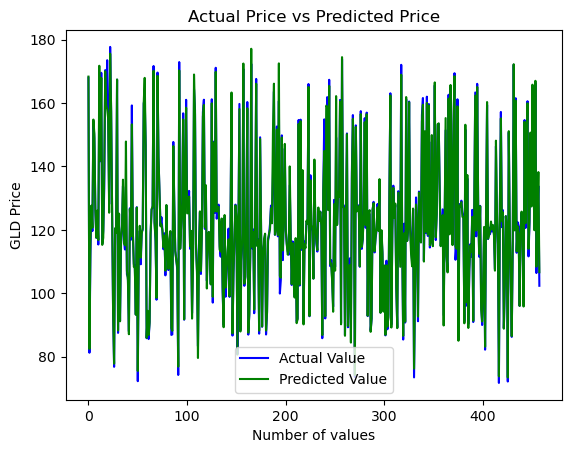

In [28]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_pred, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()